In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
hotel_data=pd.read_csv("tourist_accommodation_reviews 30 dec06.csv")
hotel_data.columns=["ID","Review Date","Location","Hotel/Restaurant name","Review"]
#hotel_data.columns=["Review"]
hotel_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn580723559,Reviewed 4 days ago,Patong,Ao Chalong Yacht Club Restaurant,I've gone to the Yacht club with my family (wi...
1,rn577320858,Reviewed 2 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,I’ve been here about six or seven times over t...
2,rn576656608,Reviewed 3 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Our host has lost his desire it seems to make ...
3,rn574668469,Reviewed 4 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,"Pork Finle, OMG is the best !!!\r\nCool , Cozy..."
4,rn573610343,Reviewed 5 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Sunday Roast recommended by a friend and well ...


In [ ]:
stop_words=nltk.corpus.stopwords.words('english')

In [ ]:
def preprocess_text(text):
  tokenized_document =nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens=[word.lower() for word in tokenized_document if word.lower() not in stop_words]
  stemmed_text=[nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text
  

In [ ]:
hotel_data=pd.read_csv("tourist_accommodation_reviews 30 dec06.csv")
hotel_data.columns=["ID","Review Date","Location","Hotel/Restaurant name","Review"]
#hotel_data.columns=["Review"]
hotel_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn580723559,Reviewed 4 days ago,Patong,Ao Chalong Yacht Club Restaurant,I've gone to the Yacht club with my family (wi...
1,rn577320858,Reviewed 2 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,I’ve been here about six or seven times over t...
2,rn576656608,Reviewed 3 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Our host has lost his desire it seems to make ...
3,rn574668469,Reviewed 4 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,"Pork Finle, OMG is the best !!!\r\nCool , Cozy..."
4,rn573610343,Reviewed 5 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Sunday Roast recommended by a friend and well ...


In [ ]:
hotel_data['Review']=hotel_data['Review'].apply(preprocess_text)
hotel_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn580723559,Reviewed 4 days ago,Patong,Ao Chalong Yacht Club Restaurant,"[i'v, gone, yacht, club, famili, wife, 6, kid,..."
1,rn577320858,Reviewed 2 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,"[six, seven, time, last, three, month, food, a..."
2,rn576656608,Reviewed 3 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,"[host, lost, desir, seem, make, place, work, y..."
3,rn574668469,Reviewed 4 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,"[pork, finl, omg, best, cool, cozi, restaur, s..."
4,rn573610343,Reviewed 5 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,"[sunday, roast, recommend, friend, well, worth..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(hotel_data['Review'].map(''.join))
X=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
X.head()

,10yeareatneverbadmealpricereasonwinefoodkhunnoklearncuisinexfrenchhusbandchefgreatcooknicefrenchdishkidneyduckfroglegexcel,10yearlivephuketeatenquitoftenhomemadepateexquisitbakespinachgetputcheestopsteakchickenthaifoodreasonpricedibukroadone,12yearagodiscovrestaurfirsttripthailandnumertimeholidayrecentreturntriphusbandremembexactlilittlhideawayordersimilardishprevioutime,13foodexcelfreshfullflavourbetterthoughatmospher,15dayricechosegobackitalianfoodstopmorenorestaurfullpizzaquickservickindmeetalsochefcametalk,16arrivgreetnormalshowntabltwousordergarlicbreadentremainfollow,1997toldplacepopularaustraliannextlanehotelstaytimewentbreakfasteveridaywelllunchdinnerdaypeopl,20yearvisitalsoyearsmallfamilirestauralwayniceownerstaffremembyeartwovisitbusiusualdespitservicqualitistillgood,2lunch2consecutdaymuchimpresshotthaistyletastiquickcookfastservicvalumoneyhighlirecommendspicifishbigcocklboildeepseaseawespicisaladonelowpoint,2ndtripphuketwentrestaurquickservicdelicifoodgreatstaffpineapplfriricehusbandpeppersteakfaulteitherdish,...,yearvisitphuketnumeroccasalwayfindwaybackripperlittlfrillrestaurvenuoperlovethaifamiliexcess20yearservexcelthai,yellowcurrispringrolldeliciphuketlongcan,yesterday345pmwenteatpizzabanglaroadmanagarnongivefoodretaurnoticrestaurclose400groupthaipeoplmanaglet,yesterdaygotluckihearbandcouplplaysingmostliclassicrockpopsongawesomplaywednesdayfridaychancstopinterior,yesterdaylunchmanslowordersaladburgerwaitalmosthour2tablrestaurchickencomesaladextremdrichewiback,yetlovethaifoodespeciseafooddishquitsmallrestaurfooddefinitbigtastwellworthvisit,yummifoodawesombeachviewlikecoconutchickensoupcamearound9pmhubbienjoyquietmomentbeautiviewmuchlikecomerestaur,yummifoodgolunchdinnerteabreakeveridaycapuccinoshakecoconutshakethaiiceteathaibeefsaladisanstyleoystersaladgoodcheap,yummifoodhealthioptionlotclassicwelldonegreatarraysmoothishakejuicfairpricelovepeoplmanagplacelittlgardenfrontrealcosiplace,yumspicitomyumnoodlseafoodstrawberrishakeshakesweetsiderealligoodnoodlamazlipstilltinglspicegoodway10minlater
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment=SentimentIntensityAnalyzer()

In [ ]:
hotel_data=pd.read_csv("tourist_accommodation_reviews 30 dec06.csv")
#hotel_data.columns=["ID","Review Date","Location","Hotel/Restaurant name","Review"]
#hotel_data.columns=["Review"]
hotel_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn580723559,Reviewed 4 days ago,Patong,Ao Chalong Yacht Club Restaurant,I've gone to the Yacht club with my family (wi...
1,rn577320858,Reviewed 2 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,I’ve been here about six or seven times over t...
2,rn576656608,Reviewed 3 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Our host has lost his desire it seems to make ...
3,rn574668469,Reviewed 4 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,"Pork Finle, OMG is the best !!!\r\nCool , Cozy..."
4,rn573610343,Reviewed 5 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Sunday Roast recommended by a friend and well ...


In [ ]:
hotel_data.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,2957,2957,2957,2957,2957
unique,2827,1165,2,30,2827
top,rn483062256,Reviewed 2 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Walking though Old Phuket we wanted a cold bee...
freq,4,32,1487,100,4


In [ ]:
#hotel_data['compound'] = [sentiment.polarity_scores(review)['compound'] for review in hotel_data['Review']]

In [ ]:
hotel_data['compound']=[sentiment.polarity_scores(review)['compound'] for review in hotel_data['Review']]
hotel_data['neg']=[sentiment.polarity_scores(review)['neg'] for review in hotel_data['Review']]
hotel_data['neu']=[sentiment.polarity_scores(review)['neu'] for review in hotel_data['Review']]
hotel_data['pos']=[sentiment.polarity_scores(review)['pos'] for review in hotel_data['Review']]


In [ ]:
hotel_data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
0,rn580723559,Reviewed 4 days ago,Patong,Ao Chalong Yacht Club Restaurant,I've gone to the Yacht club with my family (wi...,0.8020,0.000,0.854,0.146
1,rn577320858,Reviewed 2 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,I’ve been here about six or seven times over t...,0.8860,0.000,0.778,0.222
2,rn576656608,Reviewed 3 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Our host has lost his desire it seems to make ...,0.8655,0.045,0.721,0.234
3,rn574668469,Reviewed 4 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,"Pork Finle, OMG is the best !!!\r\nCool , Cozy...",0.9522,0.000,0.451,0.549
4,rn573610343,Reviewed 5 weeks ago,Patong,Ao Chalong Yacht Club Restaurant,Sunday Roast recommended by a friend and well ...,0.9516,0.000,0.635,0.365


In [ ]:
hotel_data[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,2957.000000,2957.000000,2957.000000,2957.000000
mean,0.646361,0.026479,0.751451,0.222068
std,0.413404,0.049986,0.123955,0.130377
min,-0.964600,0.000000,0.257000,0.000000
25%,0.542300,0.000000,0.673000,0.128000
50%,0.817600,0.000000,0.755000,0.213000
75%,0.915100,0.043000,0.840000,0.308000
max,0.991900,0.406000,1.000000,0.743000


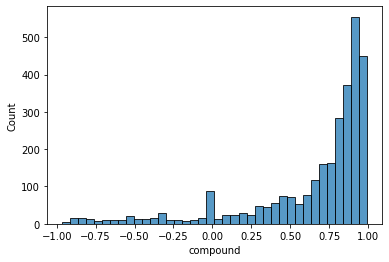

In [ ]:
sns.histplot(hotel_data['compound'])

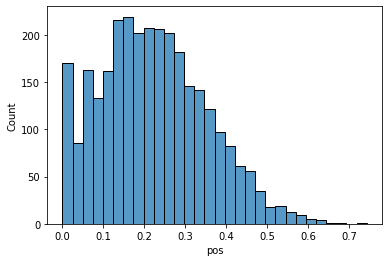

In [ ]:
sns.histplot(hotel_data['pos'])

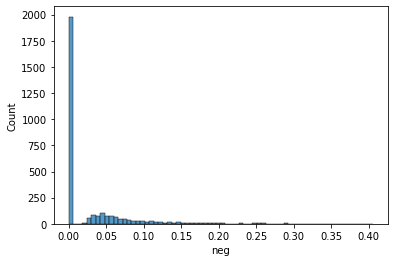

In [ ]:
sns.histplot(hotel_data['neg'])

In [ ]:
(hotel_data['compound']<=0).groupby(hotel_data['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
3 Spices Restaurant                      6
Ao Chalong Yacht Club Restaurant         2
Archee Restaurant                        6
Austrian Garden Restaurant               4
China Inn Cafe                           6
Dibuk restaurant                        13
Gallery Cafe by Pinky                    6
Kopitiam by Wilai                       10
Mee Ton Poe                             10
Mor Mu Dong                             10
Natural Restaurant                      20
No 9 Restaurant                          9
Pan Yaah Thai Restaurant                 9
Papaya                                   5
Pizzeria Da Moreno                      12
S&G Family Restaurant                    5
Sabai Sabai                             11
Song Pee Nong 2                         11
Surf and Turf by Soul Kitchen            5
The Cook                                11
The Drunken Leprechaun                  11
The Kitchen                             21
The Orchid Garden               

In [ ]:
percent_negative=pd.DataFrame((hotel_data['compound']<=0).groupby(hotel_data['Hotel/Restaurant name']).sum()
                              /hotel_data['Hotel/Restaurant name'].groupby(hotel_data['Hotel/Restaurant name']).count()*100,
                              columns=['% negative reviews']).sort_values(by='% negative reviews')

percent_negative

,% negative reviews
Hotel/Restaurant name,
Ao Chalong Yacht Club Restaurant,2.000000
Austrian Garden Restaurant,4.347826
WAI thai,5.000000
Surf and Turf by Soul Kitchen,5.000000
S&G Family Restaurant,5.000000
Papaya,5.000000
3 Spices Restaurant,6.000000
Gallery Cafe by Pinky,6.000000
China Inn Cafe,6.060606


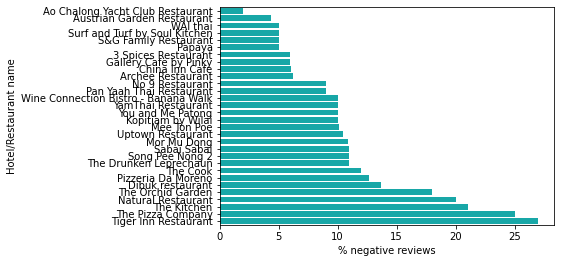

In [ ]:
sns.barplot(data=percent_negative,x='% negative reviews',y=percent_negative.index,color='c')

In [ ]:
hotel_data['processed_Review']=hotel_data['Review'].apply(preprocess_text)
reviews_positive_subset=hotel_data.loc[(hotel_data['Hotel/Restaurant name']=='Tiger Inn Restaurant')
                                       &(hotel_data['compound']>0),:]
reviews_negative_subset=hotel_data.loc[(hotel_data['Hotel/Restaurant name']=='Tiger Inn Restaurant')
                                       &(hotel_data['compound']<=0),:]
reviews_negative_subset.head()


,ID,Review Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed_Review
2860,rn570008645,"Reviewed March 31, 2018",Phuket Town,Tiger Inn Restaurant,We went there purely because it was close and ...,-0.6261,0.108,0.892,0.000,"[went, pure, close, feel, like, go, far, feed,..."
2862,rn565431201,"Reviewed March 9, 2018",Phuket Town,Tiger Inn Restaurant,"As far as Thai restaurants go, this one was at...",-0.0000,0.118,0.788,0.094,"[far, thai, restaur, go, one, averag, consid, ..."
2864,rn563939626,"Reviewed March 3, 2018",Phuket Town,Tiger Inn Restaurant,Food was average at best. My husband selected ...,-0.4404,0.174,0.705,0.121,"[food, averag, best, husband, select, fresh, f..."
2866,rn559978329,"Reviewed February 12, 2018",Phuket Town,Tiger Inn Restaurant,"Service was slow, unfriendly and rude staff, d...",-0.7970,0.299,0.593,0.108,"[servic, slow, unfriendli, rude, staff, want, ..."
2867,rn557730098,"Reviewed February 1, 2018",Phuket Town,Tiger Inn Restaurant,"Just got ripped off at this restaurant, as we ...",0.0000,0.000,1.000,0.000,"[got, rip, restaur, order, carof, wine, usual,..."


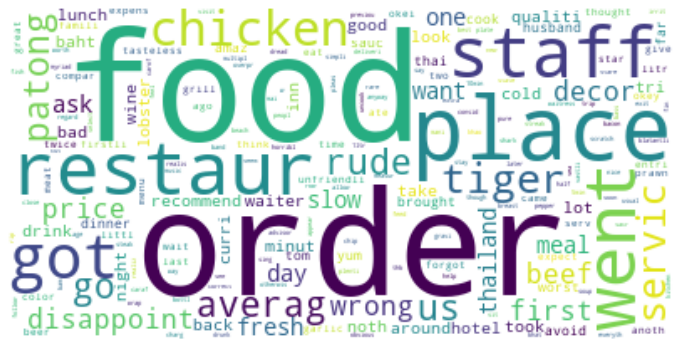

In [ ]:
neg_tokens=[word for hotel_data in reviews_negative_subset['processed_Review'] for word in hotel_data]
wordcloud=WordCloud(background_color='white').generate_from_text(
    ' '.join(neg_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


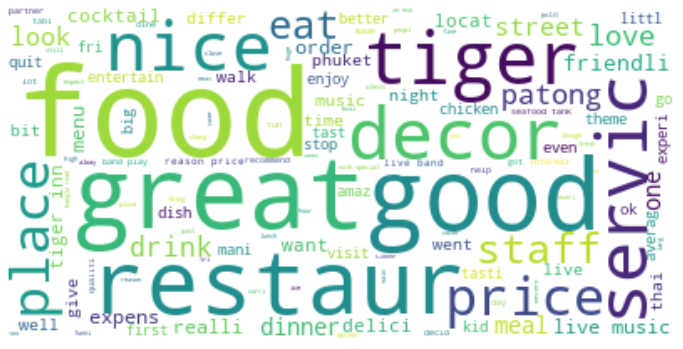

In [ ]:
pos_tokens=[word for hotel_data in reviews_positive_subset['processed_Review'] for word in hotel_data]
wordcloud=WordCloud(background_color='white').generate_from_text(
    ' '.join(pos_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk.probability import FreqDist
pos_freqdist=FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

   food    good   great restaur   tiger   price   decor    live  servic    nice 
     51      32      32      31      28      23      20      19      19      18 


In [ ]:
from nltk.probability import FreqDist
neg_freqdist=FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

   food   order   place restaur    went   staff     got chicken   tiger  servic 
     19      18      11      10       9       9       7       6       6       5 


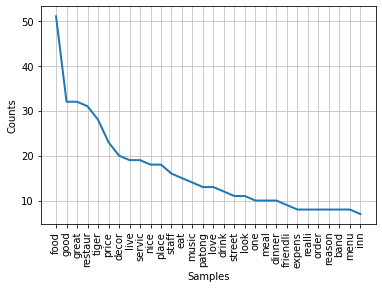

In [ ]:
pos_freqdist.plot(30)

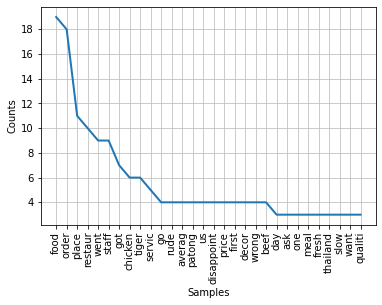

In [ ]:
neg_freqdist.plot(30)